In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import os

def calculate_distance_from_point_to_station(row):
    station_coord = (row['LATITUDE:'], row['LONGITUDE:'])
    given_point_coord = (-15.760063, -47.871154)
    return geodesic(station_coord, given_point_coord).kilometers

df_all_stations = pd.read_csv("../data/all_stations.csv", decimal=",", sep=";")

df_all_stations["Distancia"] = df_all_stations.apply(calculate_distance_from_point_to_station, axis=1) 

df_nearest_stations = df_all_stations[(df_all_stations["Distancia"] < 30)] 

print(df_nearest_stations)

    REGI?O: UF:  ESTAC?O: CODIGO (WMO):   LATITUDE:  LONGITUDE: ALTITUDE:  \
442      CO  DF  BRASILIA          A001  -15.789343  -47.925756   1160.96   

                                               Arquivo  Distancia  
442  INMET_CO_DF_A001_BRASILIA_01-01-2019_A_31-12-2...   6.688014  


In [19]:
yeardirectoryfilename = []
df_nearest_stations_weather_data = []

for filename in df_nearest_stations['Arquivo']: 
    yeardirectoryfilename.append(filename)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2019_cleaned/{filename}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2020_cleaned/{filename.replace("2019", "2020")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2021_cleaned/{filename.replace("2019", "2021")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2022_cleaned/{filename.replace("2019", "2022")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename.replace("2019", "2023")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)


df_compilation_of_nearest_stations_weather_data

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",RADIACAO GLOBAL (Kj/m²)
0,2019/01/01,0000 UTC,1.0,887.0,887.0,886.6,NaN,18.5,17.0,18.7,18.4,17.3,16.9,92.0,91.0,91.0,330.0,5.3,2.0,NaN
1,2019/01/01,0100 UTC,0.0,888.1,888.1,887.0,NaN,18.4,17.1,18.5,18.3,17.2,16.9,92.0,91.0,92.0,326.0,4.3,0.8,NaN
2,2019/01/01,0200 UTC,0.0,888.2,888.3,888.1,NaN,18.5,17.3,18.6,18.3,17.4,17.1,93.0,92.0,93.0,340.0,2.2,1.3,NaN
3,2019/01/01,0300 UTC,0.4,887.6,888.2,887.6,NaN,18.4,17.1,18.7,18.4,17.5,17.1,93.0,92.0,92.0,351.0,2.2,1.4,NaN
4,2019/01/01,0400 UTC,0.0,887.0,887.6,887.0,NaN,17.9,16.7,18.4,17.9,17.2,16.7,93.0,92.0,93.0,343.0,2.0,1.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2023/12/31,1900 UTC,0.0,884.2,885.2,884.2,NaN,26.1,18.4,28.1,26.0,19.0,16.9,64.0,52.0,63.0,1.0,5.3,2.1,1252.2
43820,2023/12/31,2000 UTC,0.0,883.7,884.3,883.7,NaN,27.7,18.1,27.7,25.8,18.2,16.9,62.0,53.0,56.0,314.0,5.2,1.9,1178.8
43821,2023/12/31,2100 UTC,0.0,883.5,883.7,883.4,NaN,25.5,17.4,27.7,25.5,18.0,16.9,62.0,52.0,61.0,300.0,5.1,2.7,873.0
43822,2023/12/31,2200 UTC,0.0,884.5,884.5,883.5,NaN,23.4,18.2,25.5,23.4,18.2,17.4,72.0,61.0,72.0,293.0,4.8,2.0,104.0


<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 0 to 43823
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   43824 non-null  datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       43801 non-null  float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  43803 non-null  float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        43793 non-null  float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       43793 non-null  float64       
 5   RADIACAO GLOBAL (KJ/m²)                                4693 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           43802 non-null  float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   43802 non-null  f

/tmp/ipykernel_1675/2315678693.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_avarage_temperature_by_month = df_sorted.resample("M").mean()


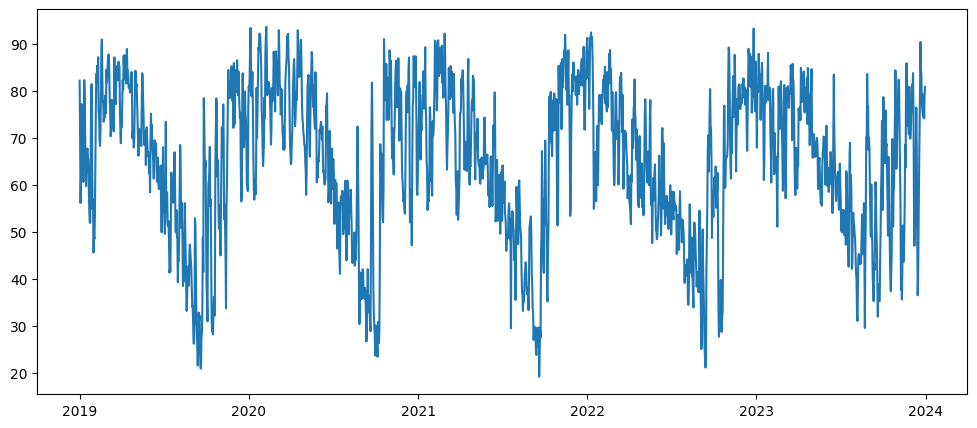

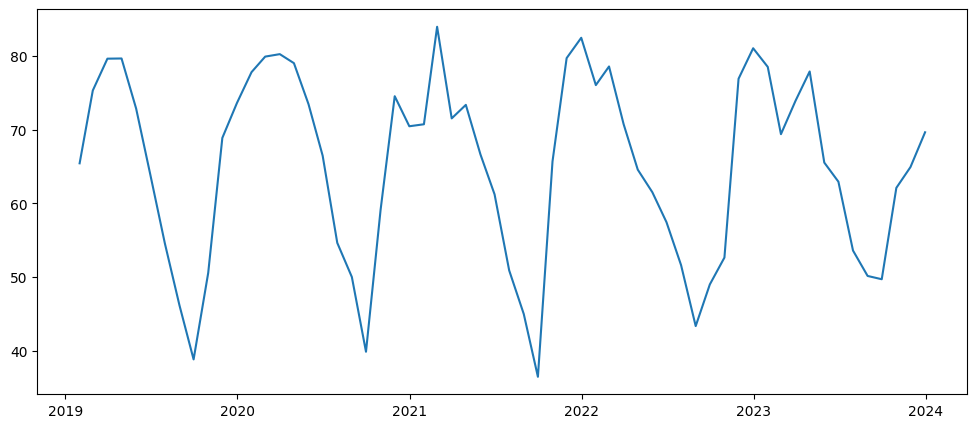

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)             0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)            0
RADIACAO GLOBAL (KJ/m²)                                  1461
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                0
TEMPERATURA DO PONTO DE ORVALHO (°C)                        0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)            0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)            0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                    0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                    0
UMIDADE RELATIVA DO AR, HORARIA (%)                         0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                        0
VENTO, RAJADA MAXIMA (m/s)                                  0
VENTO, V

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# df_nearest_stations_weather_data = []

# for filename in df_nearest_stations['Arquivo']: 
#     df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename}', decimal=".", sep=";")
#     df_nearest_stations_weather_data.append(df_weather_data)

# df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

df_cleaned = df_compilation_of_nearest_stations_weather_data.drop(columns=['Hora UTC'])

df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])

df_sorted = df_cleaned.sort_values(by='Data', ascending=True)

df_sorted.info()

forecast_parameter = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

# print(df_notimecollumn.info())
# print(df_notimecollumn.info())
#print(df_notimecollumn.groupby(['Data'], as_index= True).mean())

print(df_sorted.info())

#Converte Data
#df_notimecollumn['Data']=pd.to_datetime(df_notimecollumn['Data'])
df_sorted.set_index('Data', inplace=True)
df_avarage_temperature_by_day = df_sorted.resample("D").mean()
df_avarage_temperature_by_month = df_sorted.resample("M").mean()

print(df_avarage_temperature_by_day)

#Teste
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_day[forecast_parameter], label='Previsão')
plt.show()
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_month[forecast_parameter], label='Previsão')
plt.show()

# Verificar se há valores nulos
print(df_avarage_temperature_by_day.isnull().sum())

# Tratar valores nulos
df_not_null_values_day = df_avarage_temperature_by_day.ffill()
df_not_null_values_month = df_avarage_temperature_by_month.ffill()

# Divisão dos dados em treinamento (80%) e teste (20%)- DAILY
df_splited_data = int(len(df_not_null_values_day) * 0.8)
df_training, df_test = df_not_null_values_day[:df_splited_data], df_not_null_values_day[df_splited_data:]  

# Divisão dos dados em treinamento (80%) e teste (20%)- MONTHLY
df_splited_data_month = int(len(df_not_null_values_month) * 0.8)
df_training_month, df_test_month = df_not_null_values_month[:df_splited_data_month], df_not_null_values_month[df_splited_data_month:]  

<Figure size 1000x500 with 0 Axes>

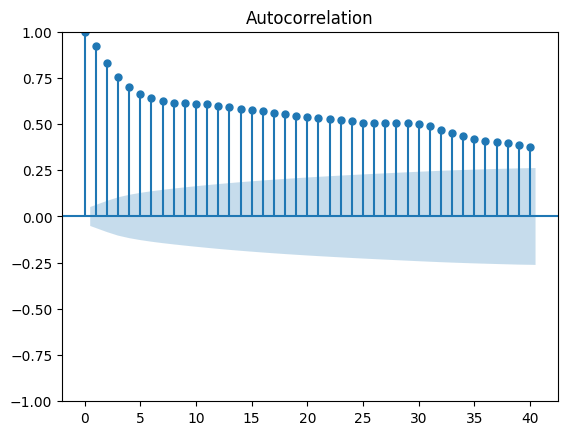

<Figure size 1000x500 with 0 Axes>

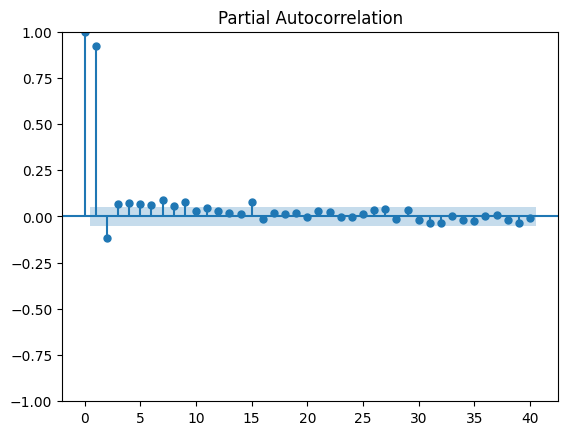

/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/julia

    p  d  q           AIC
21  2  1  1   9498.078686
22  2  1  2   9498.176350
29  3  1  1   9498.564358
30  3  1  2   9499.322831
23  2  1  3   9499.422146
15  1  1  3   9500.653449
26  3  0  2   9501.660773
25  3  0  1   9501.685997
27  3  0  3   9502.456395
14  1  1  2   9504.040312
19  2  0  3   9504.301794
18  2  0  2   9507.822208
11  1  0  3   9544.848458
24  3  0  0   9553.187581
31  3  1  3   9554.491400
9   1  0  1   9555.291976
10  1  0  2   9555.522497
17  2  0  1   9556.514352
16  2  0  0   9557.670973
7   0  1  3   9562.891903
8   1  0  0   9576.206990
28  3  1  0   9583.794899
20  2  1  0   9600.473925
6   0  1  2   9601.657285
13  1  1  1   9612.586516
5   0  1  1   9614.496402
12  1  1  0   9616.454003
4   0  1  0   9622.554636
3   0  0  3  10012.566194
2   0  0  2  10335.263157
1   0  0  1  10969.753293
0   0  0  0  12327.046944
\begin{tabular}{rrrr}
\toprule
p & d & q & AIC \\
\midrule
2 & 1 & 1 & 9498.08 \\
2 & 1 & 2 & 9498.18 \\
3 & 1 & 1 & 9498.56 \\
3 & 1 & 2 & 94

In [21]:
# Seleciona a série diária
series_day = df_training[forecast_parameter]

# Gráficos de Autocorrelação e Autocorrelação Parcial da série diferenciada
plt.figure(figsize=(10, 5))
plot_acf(series_day, lags=40)
plt.title('Autocorrelation')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(series_day, lags=40, method='ywm')
plt.title('Partial Autocorrelation')
plt.show()

import itertools

# Supondo que sua série seja 'series'
# Defina os ranges dos hiperparâmetros
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None

results = []

for order in pdq:
    try:
        model = ARIMA(series_day, order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        results.append({'p': order[0], 'd': order[1], 'q': order[2], 'AIC': aic})
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except Exception as e:
        results.append({'p': order[0], 'd': order[1], 'q': order[2], 'AIC': None})
        continue

# Criar DataFrame
df_grid = pd.DataFrame(results)
df_grid = df_grid.dropna(subset=['AIC'])
df_grid = df_grid.sort_values(by='AIC')

# Imprimir todas as configurações ordenadas pelo menor AIC
print(df_grid)

# Exportar TODA a tabela para LaTeX
print(df_grid.to_latex(index=False, float_format="%.2f"))

print(f"Melhor configuração (p,d,q): {best_order} com AIC={best_aic}")


MSE: 171.8144455020093
RMSE: 13.107800940737897


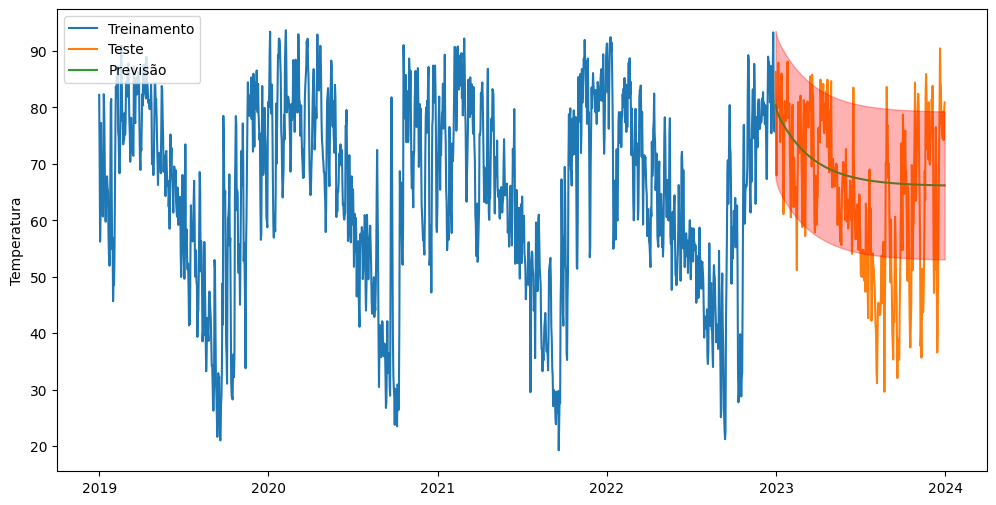

In [22]:
# Ajuste do modelo ARIMA
model = ARIMA(df_training[forecast_parameter], order=(3, 0, 1))
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test))

# Visualização das previsões
plt.figure(figsize=(12,6))
plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Temperatura')
plt.legend(loc='upper left')

# Cálculo erro quadrático
mse = mean_squared_error(df_test[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

# Salva o gráfico como arquivo de imagem
#plt.savefig('forecast.png')


/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40151D+00    |proj g|=  7.68295D-02


 This problem is unconstrained.



At iterate    5    f=  2.38921D+00    |proj g|=  2.04398D-02

At iterate   10    f=  2.38476D+00    |proj g|=  1.85266D-02

At iterate   15    f=  2.38286D+00    |proj g|=  1.42870D-03

At iterate   20    f=  2.38268D+00    |proj g|=  1.11429D-03

At iterate   25    f=  2.38265D+00    |proj g|=  1.99862D-04

At iterate   30    f=  2.38265D+00    |proj g|=  2.45861D-04

At iterate   35    f=  2.38265D+00    |proj g|=  3.27362D-05

At iterate   40    f=  2.38265D+00    |proj g|=  5.17944D-05

At iterate   45    f=  2.38265D+00    |proj g|=  5.70171D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     52   

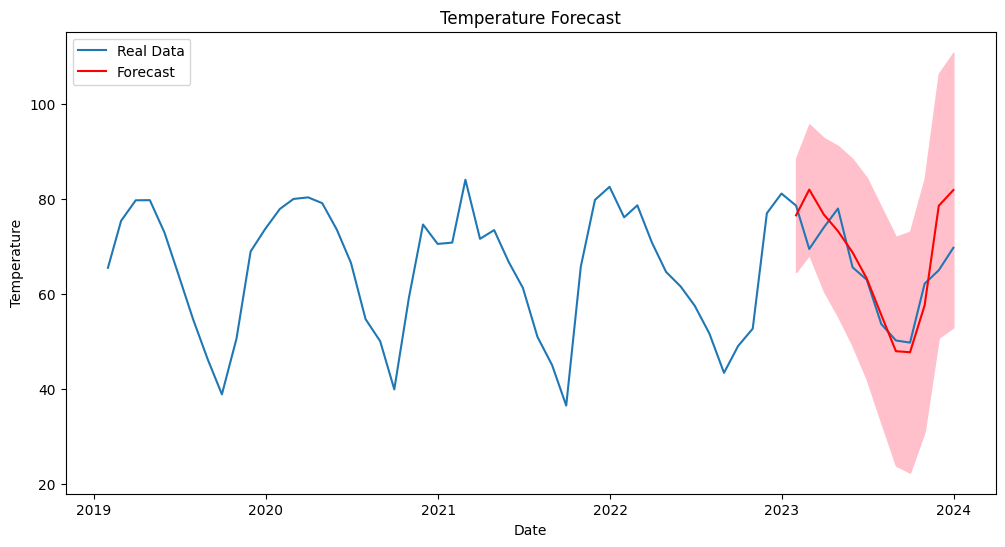

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(df_training_month[forecast_parameter], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Forecast future values
forecast_periods =  int(len(df_test_month[forecast_parameter]))  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_not_null_values_month[forecast_parameter], label='Real Data')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Temperature Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


MSE: 141.42358574935685
RMSE: 11.89216488909218


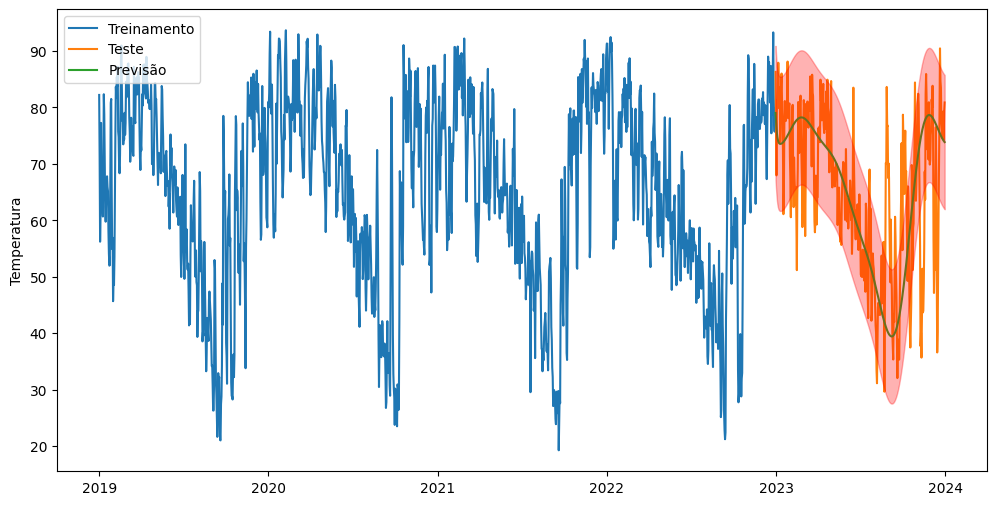

In [24]:
n = len(df_training[forecast_parameter])  # Number of data points
t = np.arange(n)
seasonality = 365  

# Create Fourier terms
def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

num_fourier_terms = 4
fourier_terms = create_fourier_terms(t, seasonality, num_fourier_terms)

# Fit the ARIMA model using arima with Fourier terms as exogenous variables
model = ARIMA(df_training[forecast_parameter],exog=fourier_terms[:n], order=(3,0,1))
model_fit = model.fit()

# Forecast future values with the fitted model
forecast_exog = create_fourier_terms(np.arange(n, n + len(df_test)), seasonality, num_fourier_terms)

# Get the forecast for the future steps with exogenous variables
forecast_df = pd.DataFrame(forecast_exog, columns=[f'Fourier_{i+1}' for i in range(num_fourier_terms * 2)])

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test), exog=forecast_df)

# Visualização das previsões
plt.figure(figsize=(12,6))
plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Temperatura')
plt.legend(loc='upper left')

# Cálculo erro quadrático
mse = mean_squared_error(df_test[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

In [25]:
# from statsmodels.tsa.arima.model import ARIMA
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt

# # Parâmetros do modelo
# seasonality = 365
# num_fourier_terms = 4

# # Função para criar os termos de Fourier
# def create_fourier_terms(t, period, num_terms):
#     terms = []
#     for i in range(1, num_terms + 1):
#         terms.append(np.sin(2 * np.pi * i * t / period))
#         terms.append(np.cos(2 * np.pi * i * t / period))
#     return np.column_stack(terms)

# # Série completa: usar treino + teste para poder criar os índices de tempo
# full_series = pd.concat([df_training, df_test])
# full_index = full_series.index
# full_values = full_series[forecast_parameter].values
# n_train = len(df_training)
# n_test = len(df_test)

# # Inicializar listas de previsões e valores reais
# forecast_rolling = []
# actuals = []

# # Rolling: prever 1 ponto por vez ao longo do período de teste
# for i in range(n_test):
#     # Janela de treino vai até o ponto atual
#     end_idx = n_train + i
#     train_series = full_values[:end_idx]
#     t_train = np.arange(end_idx)
#     t_forecast = np.array([end_idx])  # ponto seguinte
    
#     # Fourier para treino e previsão
#     fourier_train = create_fourier_terms(t_train, seasonality, num_fourier_terms)
#     fourier_forecast = create_fourier_terms(t_forecast, seasonality, num_fourier_terms)
    
#     try:
#         model = ARIMA(train_series, exog=fourier_train, order=(1, 0, 0), trend='ct')
#         model_fit = model.fit()
#         forecast = model_fit.forecast(steps=1, exog=fourier_forecast)
        
#         forecast_rolling.append(forecast[0])
#         actuals.append(full_values[end_idx])
#     except Exception as e:
#         print(f"Erro na iteração {i}: {e}")
#         forecast_rolling.append(np.nan)
#         actuals.append(full_values[end_idx])

# # Calcular RMSE
# rmse = mean_squared_error(actuals, forecast_rolling, squared=False)
# print(f"RMSE rolling 1 dia: {rmse:.3f}")

# # Visualização
# plt.figure(figsize=(12, 6))
# plt.plot(df_test.index, actuals, label='Real')
# plt.plot(df_test.index, forecast_rolling, label='Rolling Forecast (1 dia)')
# plt.fill_between(df_test.index,
#                  np.array(forecast_rolling) - rmse,
#                  np.array(forecast_rolling) + rmse,
#                  alpha=0.3, color='red', label='±RMSE')
# plt.legend()
# plt.ylabel('Temperatura')
# plt.title('Previsão Rolling de 1 Dia com ARIMA + Fourier')
# plt.show()
